Demo for creating line and bar plot.
Most stock charts depict a line plot showing the stock prices, with a bar plot underneath showing the volume of stocks traded.

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [3]:
VZ_url = "https://data.nasdaq.com/api/v3/datasets/WIKI/VZ.csv?start_date=2013-03-27"
VZ_df = pd.read_csv(VZ_url)

# Change the 'Date' data in each dataframe to datetime/timestamp, instead of object
VZ_df["Date"] = pd.to_datetime(VZ_df["Date"], format="%Y/%m/%d")

VZ_df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,47.10,47.9024,46.840,47.31,13995096.0,0.0,1.0,47.100000,47.902400,46.840000,47.310000,13995096.0
1,2018-03-26,46.78,47.1700,46.585,47.07,15253706.0,0.0,1.0,46.780000,47.170000,46.585000,47.070000,15253706.0
2,2018-03-23,47.06,47.4550,46.200,46.29,15829967.0,0.0,1.0,47.060000,47.455000,46.200000,46.290000,15829967.0
3,2018-03-22,47.10,47.5199,46.770,46.88,14210836.0,0.0,1.0,47.100000,47.519900,46.770000,46.880000,14210836.0
4,2018-03-21,47.69,47.9600,47.270,47.28,11039354.0,0.0,1.0,47.690000,47.960000,47.270000,47.280000,11039354.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2013-04-03,49.43,49.5800,48.660,48.99,14373500.0,0.0,1.0,40.414218,40.536858,39.784662,40.054471,14373500.0
1255,2013-04-02,49.53,49.8600,49.260,49.50,12082000.0,0.0,1.0,40.495978,40.765788,40.275225,40.471450,12082000.0
1256,2013-04-01,49.06,49.3800,49.008,49.22,6926600.0,0.0,1.0,40.111704,40.373337,40.069188,40.242520,6926600.0
1257,2013-03-28,48.99,49.1900,48.900,49.15,13567000.0,0.0,1.0,40.054471,40.217992,39.980887,40.185288,13567000.0


count    252.000000
mean      48.280417
std        2.635613
min       42.890000
25%       46.435000
50%       48.310000
75%       49.482500
max       54.720000
Name: Close, dtype: float64
Initial Closing Price: 49.14, (2017-03-27 00:00:00)
Latest Closing Price: 47.31, (2018-03-27 00:00:00)
Total Change in Price: -1.83


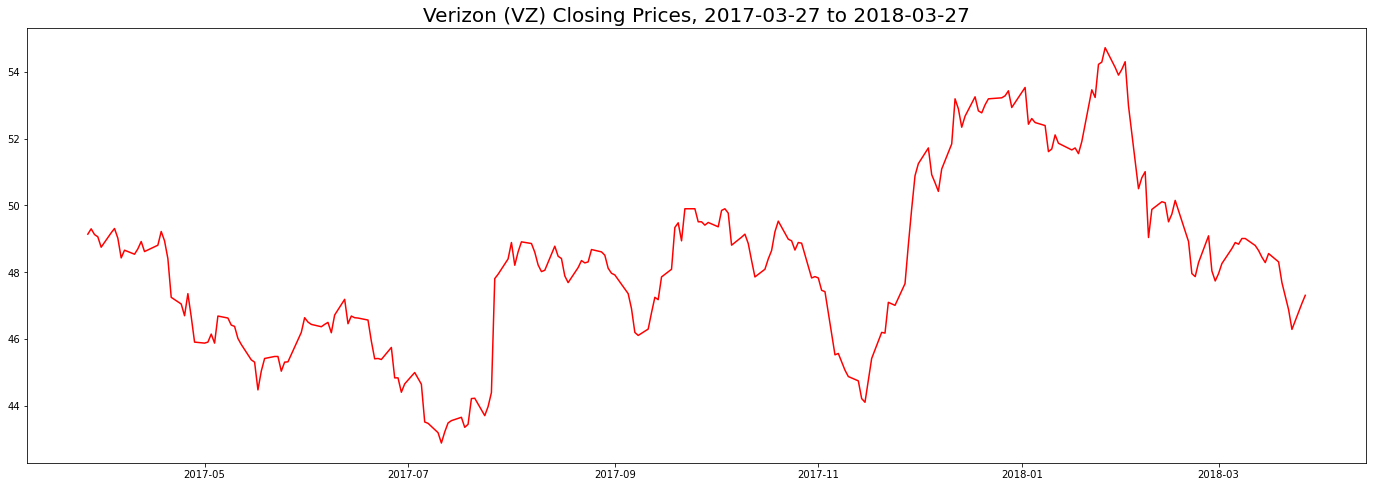

In [4]:
# Graph just the past year's worth of data
mask = (VZ_df["Date"] > '2017-03-26') & (VZ_df["Date"] <= '2018-03-27')
VZ_1yr_df = VZ_df.loc[mask]

y_1yr = VZ_1yr_df["Close"]
x_1yr = VZ_1yr_df["Date"]

# initial_close needs to be recalculated
initial_close = y_1yr.iloc[-1]
recent_close = y_1yr.iloc[0]

plt.figure(figsize=(24, 8))
plt.title("Verizon (VZ) Closing Prices, 2017-03-27 to 2018-03-27", fontsize=20)
plt.plot(x_1yr, y_1yr, color='red')


print(VZ_1yr_df.describe()["Close"])
print(f"Initial Closing Price: {initial_close}, ({x_1yr.iloc[-1]})")
print(f"Latest Closing Price: {recent_close}, ({x_1yr.iloc[0]})")
print(f"Total Change in Price: {round(recent_close - initial_close, 2)}")

<BarContainer object of 252 artists>

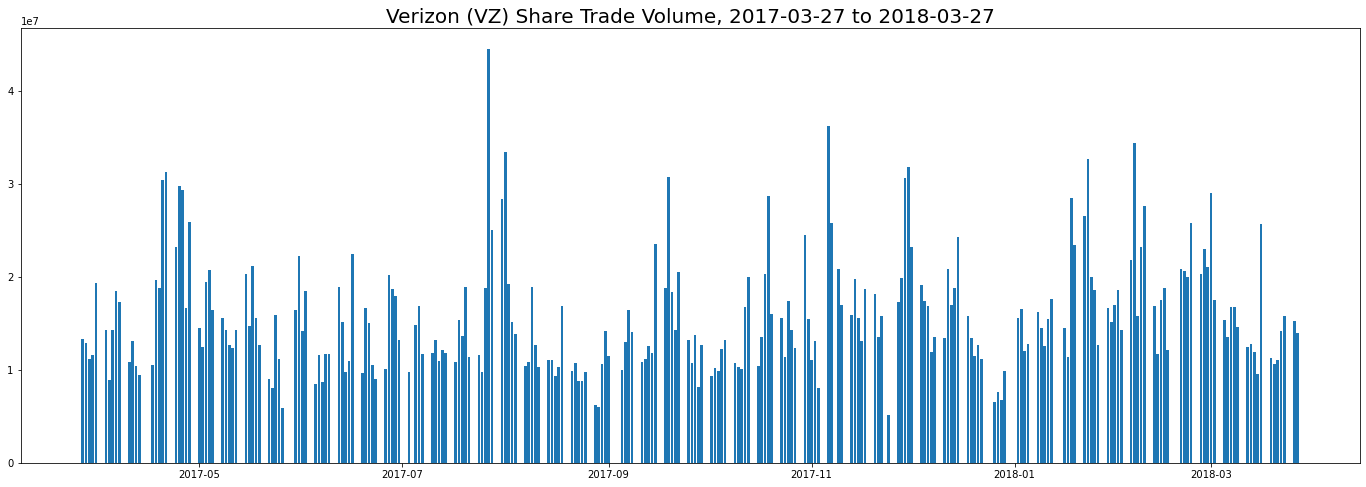

In [7]:
# Graph the volume of shares moved on each day for this year period
mask = (VZ_df["Date"] > '2017-03-26') & (VZ_df["Date"] <= '2018-03-27')
VZ_1yr_df = VZ_df.loc[mask]

y_1yr = VZ_1yr_df["Volume"]
x_1yr = VZ_1yr_df["Date"]

# initial_close needs to be recalculated
initial_close = y_1yr.iloc[-1]
recent_close = y_1yr.iloc[0]

plt.figure(figsize=(24, 8))
plt.title("Verizon (VZ) Share Trade Volume, 2017-03-27 to 2018-03-27", fontsize=20)
plt.bar(x_1yr, y_1yr)